Project for the course of Microeconometrics _ Summer 2020, M.Sc. Economics, Bonn University _ [Solmaz Ahmadi](https://github.com/solmazahmadi).

---

 ____Replication of Bronzini, R., & Iachini, E. (2014).____

This notebook contains my replication of the results from the following paper:
>  ***Bronzini, R., & Iachini, E. (2014). Are incentives for R&D effective? Evidence from a regression discontinuity approach. American Economic Journal: Economic Policy, 6(4), 100-134.***

__Downloading and viewing this notebook:__

- The best way to view this notebook is by downloading it and the repository it is located in from [GitHub](https://github.com/solmazahmadi/microeconometrics-course-project-solmazahmadi). Other viewing options like *MyBinder*  or *NBViewer* may have issues with displaying images or coloring of certain parts (missing images can be viewed in the folder [files]() on GitHub).

- The original paper, as well as the data and code provided by the authors can be accessed [here](https://www.aeaweb.org/articles?id=10.1257/pol.6.4.100).

__Information about replication and individual contributions:__

- For the replication, I try to remain true to the original structure of the paper so readers can easily follow along and compare. All tables and figures are named and labeled as they appear in Bronzini, R., & Iachini, E. (2014).

- The tables in my replication appear transposed compared to the original tables to suit my workflow in Python.

- For transparency, all sections in the replication that constitute independent contributions by me and are not part of results presented (or include deviations from the methods used) in the paper are marked as extensions.


# **Table of Contents**

    1. Introduction
    2. Theoretical Background
    3. Identification
    4. Empirical Strategy
    5. Replication of Lindo et al. (2010)
        5.1. Data & Descriptive Statistics
        5.2. Results
            5.2.1. Tests of the Validity of the RD Approach
            i. Extension: Visual Validity Check
            ii. Advanced Validity Check
            5.2.2. First Year GPAs and Academic Probation
            5.2.3. The Immediate Response to Academic Probation
            5.2.4. The Impact onSubsequent Performance
            i. Main Results for Impact on GPA & Probability of Placing Above Cutoff in the Next Term
            ii. Formal Bound Analysis on Subsequent GPA (partial extension)
            5.2.5. The Impacts on Graduation
    6. Extension: Robustness Checks
        6.1. A Closer Look at Students' Subsequent Performance.
            6.1.1. Subsequent Performance and Total Credits in Year 2
            6.1.2. Subsequent Cumulative Grade Point Average (CGPA)
        6.2. Bandwidth Sensitivity
    7. Conclusion
    8. References



<h1>Table of Contents<span class="tocSkip"></span></h1>
</strong></a></span></li></ul></li><li><span><a href="#Table-of-Contents" data-toc-modified-id="Table-of-Contents-1"><span class="toc-item-num">1&nbsp;&nbsp;</span><strong>Table of Contents</strong></a></span></li></ul></div>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Replication-of-Bronzini,-R.,-&amp;-Iachini,-E.-(2014)." data-toc-modified-id="Replication-of-Bronzini,-R.,-&amp;-Iachini,-E.-(2014).-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span><strong>Replication of Bronzini, R., &amp; Iachini, E. (2014).</strong></a></span></li></ul></li><li><span><a href="#Table-of-Contents" data-toc-modified-id="Table-of-Contents-1"><span class="toc-item-num">1&nbsp;&nbsp;</span><strong>Table of Contents</strong></a></span></li></ul></div>

# 1. Introduction

Bronzini and Lachini (2014) study the effects of a unique R&D subsidy program executed in northern Italy on investment expenditures of firms. The public R&D funding is a government policy that aims to trigger marginal projects, those that would not be carried out without the subventions. The economic rationale behind the R&D subsidies is firstly to conquer market failure of knowledge as a public good the positive externalities of which cannot be fully internalized by the firm. secondly, the government grants aid to overcome the firm's liquidity constraints. Firms were asked to present a proposal for their new projects and an independent technical committee scores them. Only firms whose scores were exceeded a specific threshold were awarded public grants. To estimate the causal impact of subsidies, Bronzini and Lachini (2014) apply a sharp regression discontinuity design (RDD) comparing the private investment spending of funded and nonfunded firms with scores close to the threshold. Among nonexperimental econometric methods, the regression discontinuity controls preferably for the endogeneity of treatment since it can be shown as a randomized experiment by arguing that the agents had been randomly drawn just below or just above the cutoff. The paper finds for the whole sample of firms, the investment expenditures do not increase significantly. since the overall impact hides the considerable heterogeneity in the program’s effect, Bronzini and Lachini (2014)  divide the sample by small and large firms and demonstrate that although the subsidy did not affect large enterprises' investment spending, small companies raised their investments—by roughly the amount of the grant they gained.


Main variables for the sample as a whole are presented in the table 1.1:

| main variables   |            main outcome variables            |      main covriates    |  
|----------------- |----------------------------------------------|----------------------- |
| treatment effect | investment (total, tangible, and intangible) |      score             |   
|        -         |              labor costs                     |       ROA              |   
|        -         |             employmentand                    | Net worth assets/Debts |   
|        -         |                 wages                        |   Cash flow/Sales      |   
|        -         |            service costs                     |  Interest costs/Debts  |   


(((
 By letting the outcome variable be a function of the score, the average treatment
effect of the program is assessed through the estimated value of the discontinuity at
the threshold. ))))

The rest of notbook is structured as follows. In the second section, we review the theoretical framework for the paper. Sectin 3 describes the identification strategy utilized by the authors to unravel causal effects of gorment subsidy program on investment expenditure of companies. Section 4 discusses the paper emprical method used for the estimation. In section 5, we replicate the key results of the paper by Bronzini and Lachini (2014) and discuss it in detail. Section 6 conducts and evaluates the results using multiple robustness checks. finaly, last section colcludes remarks.


In [52]:
import numpy as np
import pandas as pd
import pandas.io.formats.style
import seaborn as sns
import statsmodels as sm
import statsmodels.formula.api as smf
import statsmodels.api as sm_api
import matplotlib as plt
from IPython.display import HTML

In [53]:
df = pd.read_csv("https://raw.githubusercontent.com/solmazahmadi/microeconometrics-course-project-solmazahmadi/master/project_data/Bronzini_Lachini_dataset.csv")
df.index.set_names("Individual", inplace=True)
df = df.drop(columns = "Unnamed: 0")# to delete or remove a column or row from pandas, pandas.DataFrame.drop, DataFrame.drop(self, labels=None, axis=0, index=None, columns=None, level=None, inplace=False, errors='raise')
df

,FIRM,K,KT,KINT,SALES,ASSETS,INV,INVT,INVINT,LINV,...,streatfclow,streatfclow2,streatfclow3,treatfchigh,streatfchigh,streatfchigh2,streatfchigh3,streat,streat2,streat3
Individual,,,,,,,,,,,,,,,,,,,,,
0,1.0,21237.0,19339.0,1898.0,80721.0,159591.0,9707.0,9318.0,389.0,11.640183,...,10.0,100.0,1000.0,0.0,0.0,0.0,0.0,10.0,100.0,1000.0
1,2.0,1646.0,1487.0,159.0,3707.0,3381.0,373.0,75.0,298.0,11.554422,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,49.0,343.0
2,3.0,6931.0,6728.0,203.0,25301.0,21127.0,1545.0,1216.0,329.0,11.565603,...,14.0,196.0,2744.0,0.0,0.0,0.0,0.0,14.0,196.0,2744.0
3,4.0,1131.0,1115.0,16.0,12143.0,10842.0,-114.0,-114.0,0.0,11.549740,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,1691.0,1649.0,42.0,5263.0,7688.0,235.0,219.0,16.0,11.553098,...,10.0,100.0,1000.0,0.0,0.0,0.0,0.0,10.0,100.0,1000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,353.0,1126.0,985.0,141.0,30938.0,22915.0,-63.0,-49.0,-14.0,11.550231,...,0.0,0.0,0.0,1.0,2.0,4.0,8.0,2.0,4.0,8.0
353,354.0,494378.0,185503.0,308875.0,773040.0,1123660.0,-103863.0,14641.0,-118504.0,0.000000,...,0.0,0.0,0.0,1.0,13.0,169.0,2197.0,13.0,169.0,2197.0
354,355.0,41568.0,40187.0,1381.0,161396.0,272656.0,-10065.0,-10486.0,421.0,11.448910,...,0.0,0.0,0.0,1.0,9.0,81.0,729.0,9.0,81.0,729.0


In [54]:
df.describe() #generating some descriptive statistics of the numerical values of the Series or DataFrame.

,FIRM,K,KT,KINT,SALES,ASSETS,INV,INVT,INVINT,LINV,...,streatfclow,streatfclow2,streatfclow3,treatfchigh,streatfchigh,streatfchigh2,streatfchigh3,streat,streat2,streat3
count,357.00000,357.000000,357.000000,357.000000,3.570000e+02,3.570000e+02,357.000000,357.000000,357.000000,357.000000,...,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.00000,357.000000,357.000000,357.000000
mean,179.00000,11826.036415,9172.428571,2653.607843,5.306832e+04,5.004833e+04,769.190476,895.103641,-125.913165,11.526790,...,3.620000,47.480000,705.740000,0.323333,2.690000,33.830000,495.97000,6.498599,84.526611,1266.868347
std,103.20126,45922.319555,36238.416208,18080.069478,1.759294e+05,1.524998e+05,8744.807233,6233.400737,7029.515834,0.614676,...,5.872867,95.525634,1721.978678,0.468530,5.165544,82.289324,1437.94125,6.512574,116.175635,2181.985730
min,1.00000,7.000000,6.000000,0.000000,2.800000e+02,1.700000e+02,-103863.000000,-43504.000000,-118504.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,90.00000,409.000000,252.000000,40.000000,3.853000e+03,3.331000e+03,-186.000000,-80.000000,-102.000000,11.549046,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,179.00000,1482.000000,1046.000000,145.000000,9.605000e+03,9.122000e+03,80.000000,29.000000,5.000000,11.551607,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,5.000000,25.000000,125.000000
75%,268.00000,4935.000000,3985.000000,578.000000,2.893400e+04,2.516800e+04,1015.000000,660.000000,225.000000,11.560562,...,6.000000,36.000000,216.000000,1.000000,3.000000,9.000000,27.00000,12.000000,144.000000,1728.000000
max,357.00000,494378.000000,480260.000000,308875.000000,1.863889e+06,1.795366e+06,55137.000000,59262.000000,35658.000000,11.976665,...,22.000000,484.000000,10648.000000,1.000000,22.000000,484.000000,10648.00000,22.000000,484.000000,10648.000000


In [73]:
#check for missing values 
#print column name with missing values
#for column in df.columns:
#    assert not df[column].isna().any(), "there are NAs"
df.columns[df.isna().any()]

Index(['EMPL', 'CR', 'AGE', 'LEMPL', 'LWAGE', 'fclowm', 'fchighm', 'fclow',
       'fchigh', 'sfclow', 'sfclow2', 'sfclow3', 'sfchigh', 'sfchigh2',
       'sfchigh3', 'treatfclow', 'streatfclow', 'streatfclow2', 'streatfclow3',
       'treatfchigh', 'streatfchigh', 'streatfchigh2', 'streatfchigh3'],
      dtype='object')

In [68]:
df.loc[:, df.isnull().sum() > 0].column #columns_with_NA = [] #for column in df.columns:  #if df[column].isna().any():  #columns_with_NA.append(column) #columns_with_NA
                                                                                                  

Index(['EMPL', 'CR', 'AGE', 'LEMPL', 'LWAGE', 'fclowm', 'fchighm', 'fclow',
       'fchigh', 'sfclow', 'sfclow2', 'sfclow3', 'sfchigh', 'sfchigh2',
       'sfchigh3', 'treatfclow', 'streatfclow', 'streatfclow2', 'streatfclow3',
       'treatfchigh', 'streatfchigh', 'streatfchigh2', 'streatfchigh3'],
      dtype='object')

AttributeError: module 'matplotlib' has no attribute 'show'

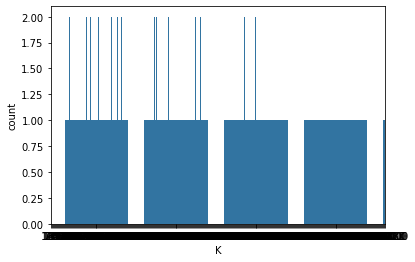

In [77]:
# the distribution plot of discrete random variable


key_var= ["K","KT","KINT","SALES","ASSETS","INV","INVT",
    "INVINT","LINV","KINT","SALES","ASSETS","INV","INVT",
    "LINV","LINVT","LINVIT","INVSALES","INVTSALES",
    "INVINTSALES","INVK", "INVTK", "INVINTK","INVA",
    "INVTA","INVINTA","LC", "SC","LCSALES","SCSALES",
    "EMPL","CR","AGE", "LEMPL","LWAGE","smallm", "largem"
]
for column in key_var:
    sns.countplot(df[column], color="#1f77b4")
    plt.show()



In [75]:
display(df)

,FIRM,K,KT,KINT,SALES,ASSETS,INV,INVT,INVINT,LINV,...,streatfclow,streatfclow2,streatfclow3,treatfchigh,streatfchigh,streatfchigh2,streatfchigh3,streat,streat2,streat3
Individual,,,,,,,,,,,,,,,,,,,,,
0,1.0,21237.0,19339.0,1898.0,80721.0,159591.0,9707.0,9318.0,389.0,11.640183,...,10.0,100.0,1000.0,0.0,0.0,0.0,0.0,10.0,100.0,1000.0
1,2.0,1646.0,1487.0,159.0,3707.0,3381.0,373.0,75.0,298.0,11.554422,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,49.0,343.0
2,3.0,6931.0,6728.0,203.0,25301.0,21127.0,1545.0,1216.0,329.0,11.565603,...,14.0,196.0,2744.0,0.0,0.0,0.0,0.0,14.0,196.0,2744.0
3,4.0,1131.0,1115.0,16.0,12143.0,10842.0,-114.0,-114.0,0.0,11.549740,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,1691.0,1649.0,42.0,5263.0,7688.0,235.0,219.0,16.0,11.553098,...,10.0,100.0,1000.0,0.0,0.0,0.0,0.0,10.0,100.0,1000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,353.0,1126.0,985.0,141.0,30938.0,22915.0,-63.0,-49.0,-14.0,11.550231,...,0.0,0.0,0.0,1.0,2.0,4.0,8.0,2.0,4.0,8.0
353,354.0,494378.0,185503.0,308875.0,773040.0,1123660.0,-103863.0,14641.0,-118504.0,0.000000,...,0.0,0.0,0.0,1.0,13.0,169.0,2197.0,13.0,169.0,2197.0
354,355.0,41568.0,40187.0,1381.0,161396.0,272656.0,-10065.0,-10486.0,421.0,11.448910,...,0.0,0.0,0.0,1.0,9.0,81.0,729.0,9.0,81.0,729.0


# 2. Theoretical backgraound

## 2.1 conceptual framework and emprical evidence

#The question to answer is whether the effectiveness of public subsidies for R&D is aligned with the economic therory describing that the public grants leads to an increase in firm's R&D  investment by declining the capital cost and raising the investment profitability.
It is highlited that in practice the policy is effective only by funding the marginal projects, which would be unprofitable with private financing since their invetment cost is larger than or eqal to the expected return and by cost-free government grant would be profitable and undertaken. conversely, the program would be uneffective, if subsidies used for privately-financed profitable projects(inframarginal projects) because the program will not trigger new project that firm would have not made without grant. Under this situation, firms will replace the private funding with public funding without R&D investment expansion.

. On the other
hand, if the policy subsidizes projects that would be profitable even without the
incentive (inframarginal projects) the grant will be ineffective because recipient
firms would have made the investment anyway, and the program will not activate
new R&D spending. In these circumstances, firms will substitute completely public
for privately financed R&D to take advantage of the lower cost of public funds, but
will not expand R&D investment (Wallsten 2000). The incentive becomes a money
transfer to firms without any positive effect on investment.
There are several considerations to bear in mind concerning the policy’s effectiveness. First, all other things being equal, we can predict that the effectiveness
of the grant is more likely to be associated with proposals submitted by firms that
encounter greater difficulties in financing their projects. For example, enterprises
which (owing to more acute problems of asymmetric information) face higher costs
of capital or experience greater difficulties in accessing capital markets are more
likely to find that their projects will be unprofitable if privately financed only.
Second, financing innovation is more difficult than financing tangible investment
because of stronger informational asymmetries. These asymmetries may be amplified because R&D investments are riskier and less well understood by nonexpert
agents than other kinds of investment, or because firms may be less willing to share
information with intermediaries to prevent leaks of knowledge to competitors. It
could be more difficult to finance intangible investment also because financial intermediaries might prefer to fund projects related to tangible assets which, in turn, can
be offered as collateral, rather than to intangible assets that are exclusively connected with future streams of profits (see Guiso 1998; Bond and Van Reenen 2007;
Hall and Lerner 2009).
A third consideration on the effectiveness of the program concerns the strategic
role played by the procedure for assigning funds, since only programs that subsidize marginal projects will activate additional investment. Even assuming that public institutions demonstrate an excellent ability in selecting the firms to subsidize,
they may not have all the information necessary to distinguish between marginal
and inframarginal projects. Therefore it is possible that, at least in part, funds will
be given to inframarginal projects, thereby reducing the effectiveness of the subsidies. Furthermore, public institutions might be tempted to subsidize inframarginal
projects to convince public opinion that the policy is not wasting resources given
the higher probability of success of inframarginal investments (Wallsten 2000 and
Lach 2002).
Up to now we have focused primarily on the direct effects of the subsidy on
expenditure. However, several indirect effects of the policy might change the cost
or revenue of the investment, generating multiple potential outcomes. For example,
the grant might convey information on the profitability of the project and reduce
the information asymmetries that subsidized firms face, lowering the private costs
of capital further (Meuleman and De Maeseneire 2012). Moreover, thanks to the
grants, firms may benefit from expanded or upgraded research facilities or from
better-trained researchers, increasing the revenue of other current or future projects,
and eventually increasing the marginal returns of the investment. These mechanisms
can amplify the impact of the policy and induce firms to increase R&D outlays by


## 2.3 Empirical Strategy and Data